## Variable Binning and Plotting

<img style = "float: right" src = "https://www.ft.com/__origami/service/image/v2/images/raw/https%3A%2F%2Fd1e00ek4ebabms.cloudfront.net%2Fproduction%2F6b7c5fa6-b824-4430-b544-2102ad555fd1.jpg?source=Alphaville" width = "300"/>


[Time; 25 minutes]

* **Learning objective 0:** Use %matplotlib inline
* **Learning objective 1:** Create categorical variables in Python
* **Learning objective 2:** Create % of Y by X
* **Learning objective 3:** Write in a function to loop through 
* **Learning objective 4:** How to evaluate a classification decision tree model?
* **Learning objective 5:** How to Create the Gains Table and Plotting in Python?



The dataset is the [wine quality data](https://www.kaggle.com/rajyellow46/wine-quality)

In [5]:
import numpy as np
import pandas as pd
path = 'C:/Users/Administrator/Desktop/CU/CU_SM2022/APANPS5420_001_2022_2-ANOMALYDETECTION/3'
df = pd.read_csv(path + '/winequalityN.csv')
df.tail()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
6496,red,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


<AxesSubplot:>

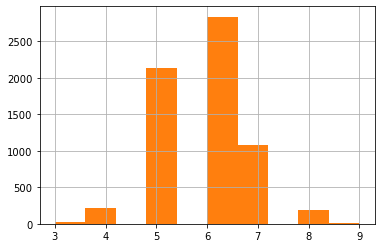

In [6]:
df['quality'].hist()
df.quality.hist()

<AxesSubplot:>

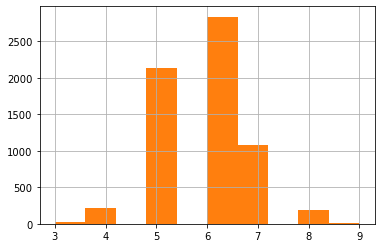

In [7]:
%matplotlib inline
df['quality'].hist()
df.quality.hist()

In [8]:
df['target'] =np.where(df['quality']>=6,1,0)
df['red_wine'] = np.where(df['type']=='red',1,0)

In [9]:
df['target'].value_counts()

1    4113
0    2384
Name: target, dtype: int64

In [10]:
df.columns

Index(['type', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'target', 'red_wine'],
      dtype='object')

In [11]:
features = [ 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'red_wine']

### [Learning objective 1] Create categorical variables using qcut
* You may need to split a continuous variable into a categorial variable
* Notice how the NoData category is added for "NA".

<AxesSubplot:>

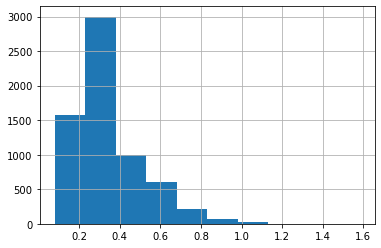

In [12]:
df['volatile acidity'].hist()

In [51]:
# Below has missing values. Do not drop them. Put them in a category.
df['sulphates_bin'] = pd.qcut(df['sulphates'],10,duplicates='drop').astype(str)
df['sulphates_bin'].value_counts(dropna=False)

(0.41, 0.45]     777
(0.37, 0.41]     682
(0.219, 0.37]    652
(0.45, 0.48]     642
(0.48, 0.51]     638
(0.63, 0.72]     627
(0.54, 0.58]     625
(0.51, 0.54]     623
(0.58, 0.63]     620
(0.72, 2.0]      607
nan                4
Name: sulphates_bin, dtype: int64

In [29]:
df['sulphates_bin'] = pd.qcut(df['sulphates'],10,duplicates='drop').values.add_categories("NoData") 
# df['sulphates_bin'] = pd.qcut(df['sulphates'],10,duplicates='drop').values.add_categories("NoData") 
# df['sulphates_bin'] = df['sulphates_bin'].fillna("NoData").astype(str)
# df['sulphates_bin'].value_counts(dropna=False)

In [35]:
pd.qcut(df['red_wine'],10,duplicates='drop').values.add_categories("NoData").astype(str)

array(['(-0.001, 1.0]', '(-0.001, 1.0]', '(-0.001, 1.0]', ...,
       '(-0.001, 1.0]', '(-0.001, 1.0]', '(-0.001, 1.0]'], dtype='<U13')

In [41]:
# You can write a function and loop through 
def binning(var):
    df[var + '_bin'] = pd.qcut(df[var],10,duplicates='drop').values.add_categories("NoData")
    df[var + '_bin'] = df[var + '_bin'].fillna("NoData").astype(str)
    df[var + '_bin'].value_counts(dropna=False)
    
#to_bin = ['fixed acidity', 'pH', 'volatile acidity', 'sulphates', 'citric acid', 'residual sugar', 'chlorides']
for i in features:
    binning(i)
 
features_bin = [f + '_bin' for f in features]
features_bin

['fixed acidity_bin',
 'volatile acidity_bin',
 'citric acid_bin',
 'residual sugar_bin',
 'chlorides_bin',
 'free sulfur dioxide_bin',
 'total sulfur dioxide_bin',
 'density_bin',
 'pH_bin',
 'sulphates_bin',
 'alcohol_bin',
 'red_wine_bin']

In [55]:

df['fixed acidity_bin'].value_counts(dropna=False)

(6.5, 6.8]      944
(3.799, 6.0]    827
(7.9, 8.8]      652
(7.2, 7.5]      634
(8.8, 15.9]     605
(7.5, 7.9]      602
(6.0, 6.3]      582
(6.8, 7.0]      561
(6.3, 6.5]      548
(7.0, 7.2]      532
NoData           10
Name: fixed acidity_bin, dtype: int64

### [Learning objective 2] plot the % of Y by X

The article "[Use Seaborn to Do Beautiful Plots Easy](https://medium.com/analytics-vidhya/love-the-ocean-love-seaborn-2e8737bef728)" explains there are three types of relationships to display in an exploratory data analysis:
- the distribution of X, and
- the distribution of Y by another categorical variable X, and
- the interactions of two or three variables.



In [54]:
z = df.groupby('fixed acidity_bin')['target'].agg(['count','mean']).reset_index() # What does ".reset_index()" do?
z

,fixed acidity_bin,count,mean
0,"(3.799, 6.0]",827,0.721886
1,"(6.0, 6.3]",582,0.673540
2,"(6.3, 6.5]",548,0.640511
3,"(6.5, 6.8]",944,0.648305
4,"(6.8, 7.0]",561,0.677362
5,"(7.0, 7.2]",532,0.599624
6,"(7.2, 7.5]",634,0.618297
7,"(7.5, 7.9]",602,0.564784
8,"(7.9, 8.8]",652,0.573620
9,"(8.8, 15.9]",605,0.580165


In [63]:
z['count_pcnt'] = z['count']/z['count'].sum()
z

,fixed acidity_bin,count,mean,count_pcnt
0,"(3.799, 6.0]",827,0.721886,0.127290
1,"(6.0, 6.3]",582,0.673540,0.089580
2,"(6.3, 6.5]",548,0.640511,0.084347
3,"(6.5, 6.8]",944,0.648305,0.145298
4,"(6.8, 7.0]",561,0.677362,0.086348
5,"(7.0, 7.2]",532,0.599624,0.081884
6,"(7.2, 7.5]",634,0.618297,0.097584
7,"(7.5, 7.9]",602,0.564784,0.092658
8,"(7.9, 8.8]",652,0.573620,0.100354
9,"(8.8, 15.9]",605,0.580165,0.093120


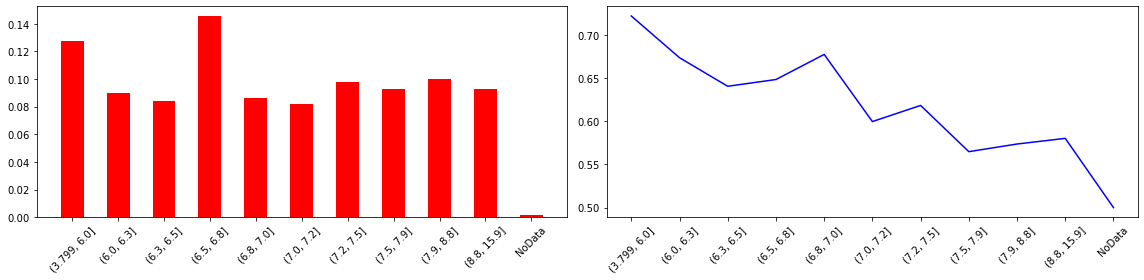

In [61]:
# Plot the graphs
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

z= df.groupby('fixed acidity_bin')['target'].agg(['count','mean']).reset_index() 
z['count_pcnt'] = z['count']/z['count'].sum()
x = z['fixed acidity_bin']
y_mean = z['mean']
count_pcnt = z['count_pcnt']
ind = np.arange(0, len(x))
width = .5

# The X count
fig = plt.figure(figsize=(16,4))
plt.subplot(121)
plt.bar(ind, count_pcnt, width, color='r')
plt.xticks(ind,x.tolist(), rotation=45)

# The Y
plt.subplot(122)
# plt.bar(ind, y_mean, width, color='b')
plt.plot(ind, y_mean , width, color='b')
plt.xticks(ind,x.tolist(), rotation=45)
plt.tight_layout()
plt.show()

### [Learning objective 3] Write in a function to loop through
- It is very inefficient if you have the above block of code for every variable.
- It is succinct to write in a function
- If you are interested in writing in a class, see [Learning Object-Orient Programming with Python in 10 Minutes](https://python.plainenglish.io/learning-object-orient-programming-and-if-name-main-in-python-in-10-minutes-9b43504a739b) by Dataman

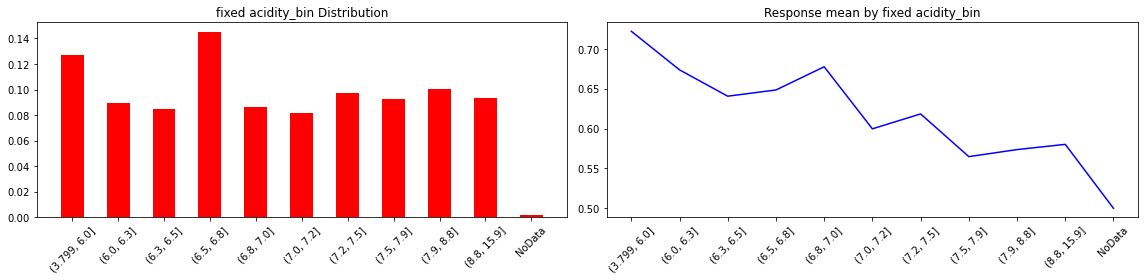

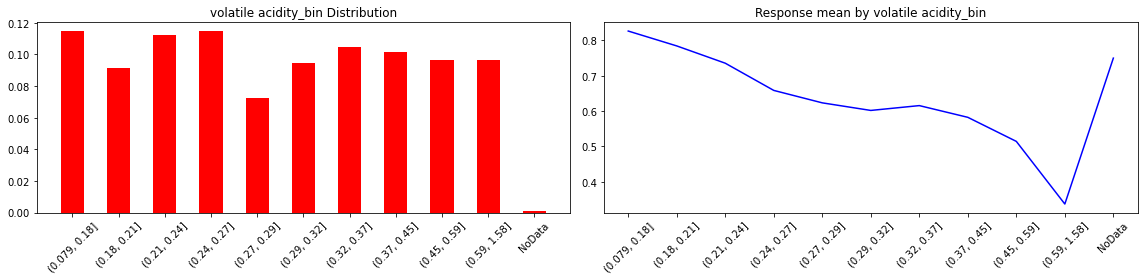

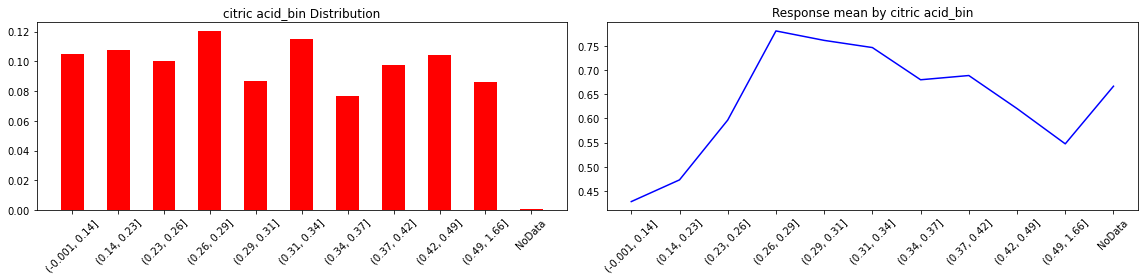

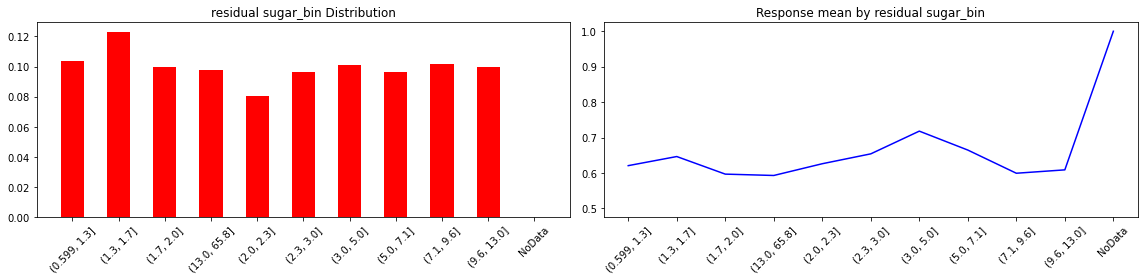

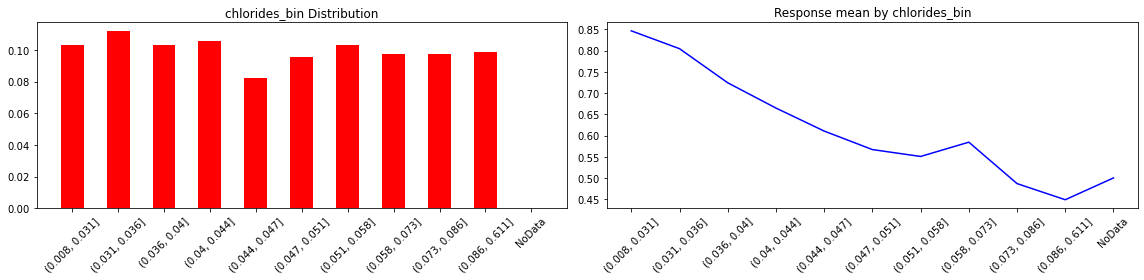

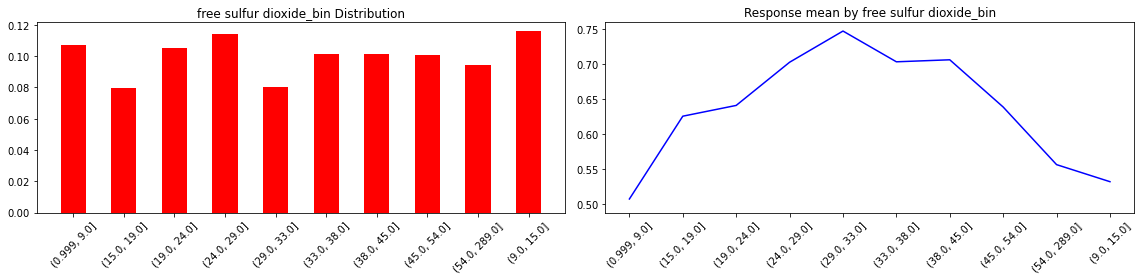

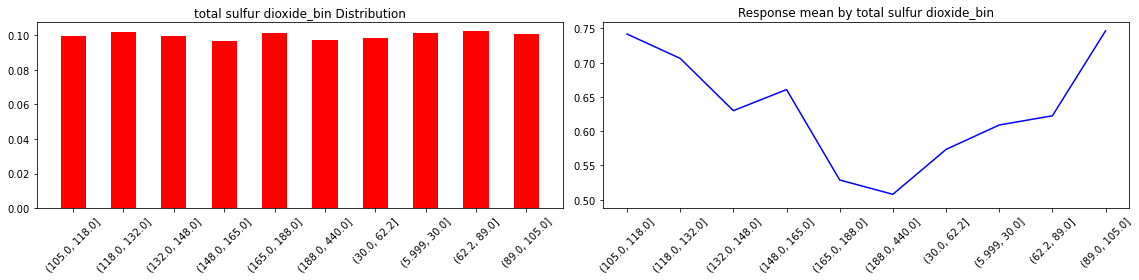

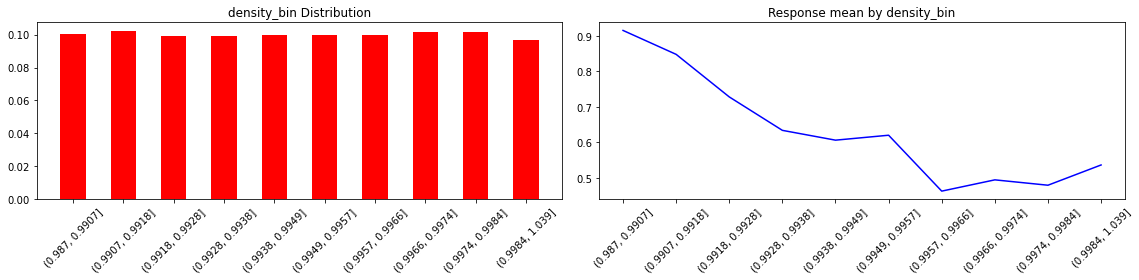

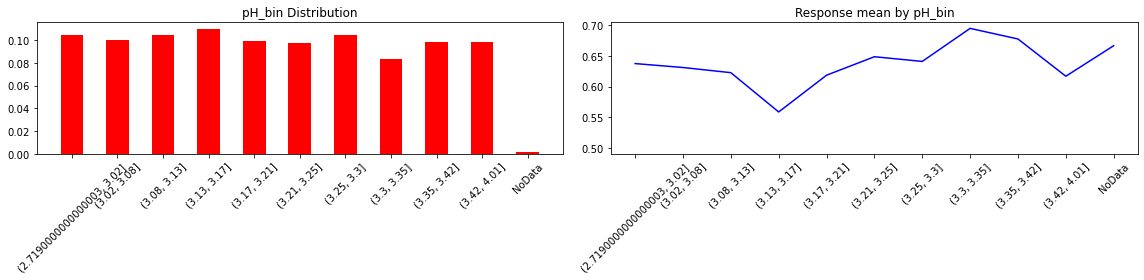

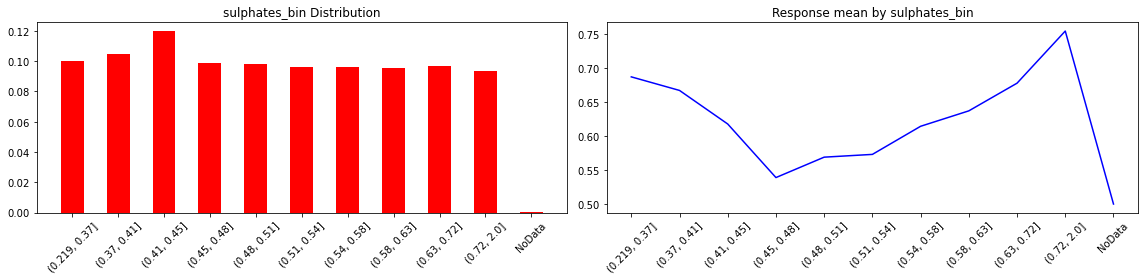

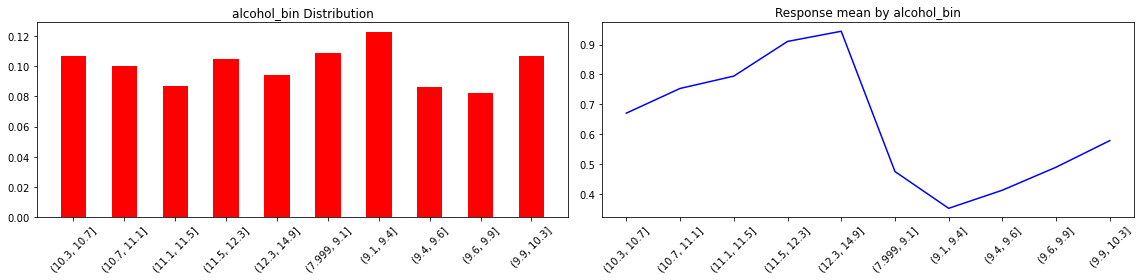

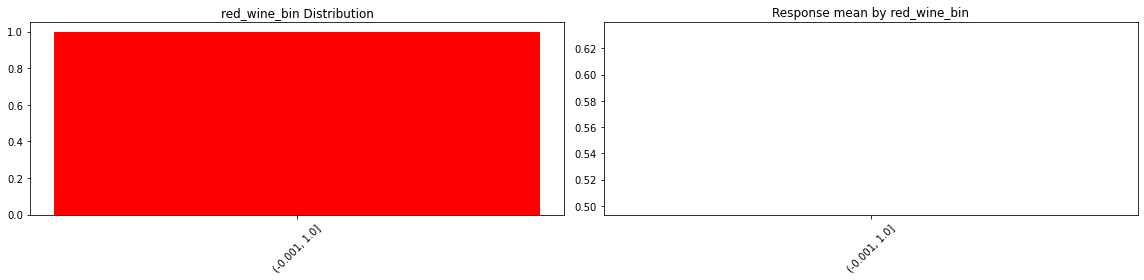

In [52]:
def plot_X_and_Y(var):
    import matplotlib
    import matplotlib.pyplot as plt
    import numpy as np

    z= df.groupby(var)['target'].agg(['count','mean']).reset_index() 
    z['count_pcnt'] = z['count']/z['count'].sum()
    x = z[var]
    y_mean = z['mean']
    count_pcnt = z['count_pcnt']
    ind = np.arange(0, len(x))
    width = .5

    fig = plt.figure(figsize=(16,4))
    plt.subplot(121)
    plt.bar(ind, count_pcnt, width, color='r')
    #plt.ylabel('X')
    plt.title(var + ' Distribution')
    plt.xticks(ind,x.tolist(), rotation=45)

    plt.subplot(122)
    #plt.bar(ind, y_mean, width, color='b')
    plt.plot(ind, y_mean, width, color='b')
    #plt.ylabel('Y by X')
    plt.xticks(ind,x.tolist(), rotation=45)
    plt.tight_layout()
    plt.title('Response mean by ' + var)
    plt.show()
    
for i in features_bin:
    plot_X_and_Y(i)  
    

### [Learning objective 4] Other kind of distributions
- Does the above discretization work for other distributions?
- What is the disadvantage?

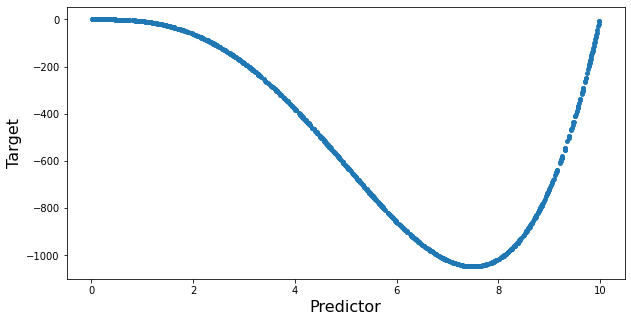

In [144]:
import matplotlib.pyplot as plt
import pandas as pd

# for calculating mean_squared error
from sklearn.metrics import mean_squared_error

# creating a dataset with curvilinear relationship
n= 1000
#xx=10*np.random.normal(0,1,n)
xx=10*np.random.random(n)

yy=1*(xx) - 10*(xx**3) + 1*(xx**4) #+np.random.normal(-100,100,n)

# plotting dataset
plt.figure(figsize=(10,5))
plt.scatter(xx,yy,s=15)
plt.xlabel('Predictor',fontsize=16)
plt.ylabel('Target',fontsize=16)
plt.show()

In [154]:
dfx = pd.DataFrame({'xx':xx,'yy':yy})
dfx

N_bin = 10
dfx['xx_bin'] = pd.qcut(dfx['xx'],N_bin,duplicates='drop').values.add_categories("NoData")
dfx['xx_bin'] = dfx['xx_bin'].fillna("NoData").astype(str)
dfx

,xx,yy,xx_bin
0,9.840778,-141.896078,"(8.878, 9.984]"
1,8.707035,-844.781509,"(8.098, 8.878]"
2,9.034487,-702.946619,"(8.878, 9.984]"
3,2.429481,-106.129631,"(1.994, 3.049]"
4,1.701380,-39.169128,"(1.002, 1.994]"
...,...,...,...
995,8.245541,-975.314078,"(8.098, 8.878]"
996,2.868981,-165.528086,"(1.994, 3.049]"
997,4.563282,-512.053652,"(4.176, 4.968]"
998,7.083920,-1029.538015,"(7.021, 8.098]"


In [155]:
# Plot the graphs
z= dfx.groupby('xx_bin')['yy'].agg(['count','mean']).reset_index() 
z['count_pcnt'] = z['count']/z['count'].sum()
z
x = z['xx_bin']
y_mean = z['mean']
count_pcnt = z['count_pcnt']
y_mean 

0      -1.908296
1     -28.066932
2    -121.933243
3    -305.701885
4    -513.921070
5    -725.198231
6    -944.995831
7   -1036.292792
8    -894.874747
9    -397.877333
Name: mean, dtype: float64

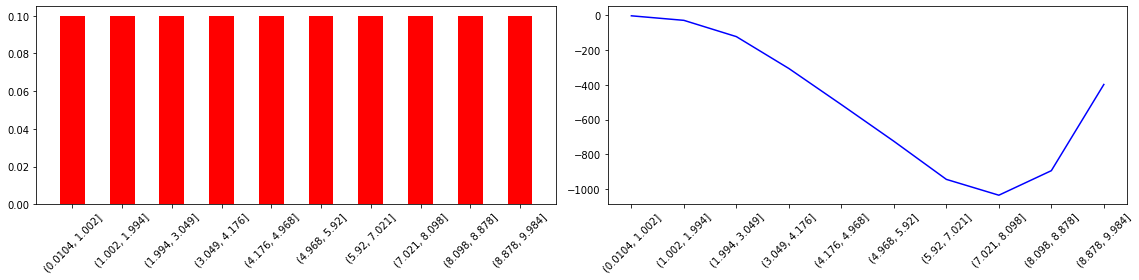

In [156]:
# Plot the graphs
z= dfx.groupby('xx_bin')['yy'].agg(['count','mean']).reset_index() 
z['count_pcnt'] = z['count']/z['count'].sum()
x = z['xx_bin']
y_mean = z['mean']
count_pcnt = z['count_pcnt']
ind = np.arange(0, len(x))
width = .5

# The X count
fig = plt.figure(figsize=(16,4))
plt.subplot(121)
plt.bar(ind, count_pcnt, width, color='r')
plt.xticks(ind,x.tolist(), rotation=45)

# The Y
plt.subplot(122)
#plt.bar(ind, y_mean, width, color='b')
plt.plot(ind, y_mean , width, color='b')
plt.xticks(ind,x.tolist(), rotation=45)
plt.tight_layout()
plt.show()

### [Learning objective 5] How to evaluate a classification decision tree model? How to code a gains table?

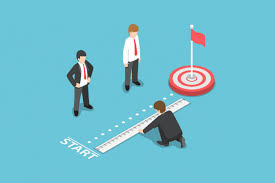


This is a classification problem. So we will use the following metrics.
* Confusion Matrix
* ROC Curve
* Gains Table
* Lift Curve
* Kolmogorov-Smirnov (K-S)

In [68]:
MineThatData = pd.read_csv(path + '/MineThatData.csv')
MineThatData.head()

,conversion,spend,train,logistic.score,svm.score,linear.score,rf.score
0,1,499.0,0,0.044415,0.009100,137.721201,136.725596
1,1,499.0,1,0.005004,0.009799,149.099715,278.558514
2,1,499.0,1,0.021934,0.011024,160.391563,324.073161
3,1,499.0,1,0.017412,0.009795,149.737481,310.449910
4,1,499.0,0,0.008344,0.009776,96.027037,111.242010


#### Data glossary
- This dataset is from the R library("gains"). It assumes there are four predicted values from models. It shows how to generate a gains table.
- Conversion: the actual, Y 
- Train: training or test split
- spend: the actual spending amount $
- logistic.score, svm.score: these are the predicted values for "conversion" by the two models
- linear.score, rf.score: these are the predicted values for "spend" by the two models

In [69]:
# In this dataset, Column "coversion"
MineThatData['conversion'].value_counts()

0    63422
1      578
Name: conversion, dtype: int64

In [70]:
MineThatData['train'].value_counts()

0    32000
1    32000
Name: train, dtype: int64

In [71]:
Y_test = MineThatData[MineThatData['train']==0]['conversion']
y_pred = MineThatData[MineThatData['train']==0]['logistic.score']
predictions = np.where(y_pred>np.mean(y_pred),1,0)

### (4.1) Confusion Matrix

In [72]:
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix

print(accuracy_score(Y_test,predictions))

0.6178125


In [73]:
confusion_matrix(Y_test,predictions)

array([[19632, 12100],
       [  130,   138]], dtype=int64)

In [74]:
cm = pd.DataFrame(confusion_matrix(Y_test,predictions))
cm.rename(columns={0:'Predicted Low', 1:'Predicted High'},
         index = {0:'Actual Low',1:'Actual High'},inplace=True)
cm

,Predicted Low,Predicted High
Actual Low,19632,12100
Actual High,130,138


### (4.2) ROC
- See [How to determine the best model](https://towardsdatascience.com/how-to-determine-the-best-model-6b9c584d0db4) for the definition

In [75]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score

#y_pred = dtree.predict_proba(X_test[features])[:,1]
roc_auc_value = roc_auc_score(Y_test,y_pred)
roc_auc_value

0.6347879559407049

In [76]:
fpr, tpr, _ = roc_curve(Y_test, y_pred)
[fpr,tpr]

[array([0.00000000e+00, 3.15139292e-05, 1.60721039e-03, ...,
        9.99779402e-01, 9.99905458e-01, 1.00000000e+00]),
 array([0., 0., 0., ..., 1., 1., 1.])]

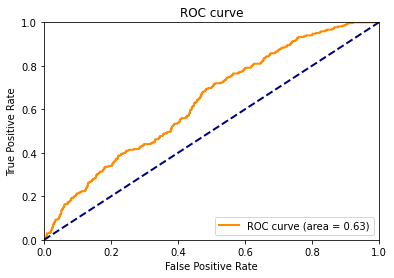

In [77]:
import matplotlib.pyplot as plt
lw=2
plt.figure(figsize=(6,4))
plt.plot(fpr,tpr, color='darkorange',lw=lw,label='ROC curve (area = %0.2f)' %roc_auc_value)
plt.plot([0,1],[0,1], color='navy',lw=lw,linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc='lower right')
plt.show()

### (4.3) Gains Table

* Click [here](https://towardsdatascience.com/how-to-determine-the-best-model-6b9c584d0db4) for more information

In [78]:
df_prep = pd.DataFrame(columns = ['actual','pred'])
df_prep['actual'] = Y_test
df_prep['pred'] =y_pred
df_prep = df_prep.sort_values(by='pred',ascending=False)
df_prep['row_id'] = range(0,0+len(df_prep))
df_prep.head()

,actual,pred,row_id
38913,0,0.242336,0
61467,0,0.169426,1
33506,0,0.122063,2
52953,0,0.112881,3
16250,0,0.111099,4


In [79]:
df_prep['decile'] = (df_prep['row_id'] / (len(df_prep)/10)).astype(int)
df_prep.loc[df_prep['decile'] == 10] =9
df_prep['decile'].value_counts()

0    3200
1    3200
2    3200
3    3200
4    3200
5    3200
6    3200
7    3200
8    3200
9    3200
Name: decile, dtype: int64

In [80]:
# Create gains table
gains = df_prep.groupby('decile')['actual'].agg(['count','sum'])
gains.columns = ['count','actual']
gains

,count,actual
decile,,
0,3200,57
1,3200,34
2,3200,27
3,3200,26
4,3200,43
5,3200,23
6,3200,23
7,3200,19
8,3200,12


In [81]:
gains['non_actual'] = gains['count'] - gains['actual']
gains['cum_count'] = gains['count'].cumsum()
gains['cum_actual'] = gains['actual'].cumsum()
gains['cum_non_actual'] = gains['non_actual'].cumsum()
gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
gains['if_random'] = np.max(gains['cum_actual']) /10
gains['if_random'] = gains['if_random'].cumsum()
gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
gains['K_S'] = np.abs( gains['percent_cum_actual'] - gains['percent_cum_non_actual']  ) * 100 
gains['gain'] = (gains['cum_actual'] / gains['cum_count']*100).round(2)
gains

,count,actual,non_actual,cum_count,cum_actual,cum_non_actual,percent_cum_actual,percent_cum_non_actual,if_random,lift,K_S,gain
decile,,,,,,,,,,,,
0,3200,57,3143,3200,57,3143,0.21,0.1,26.8,2.13,11.0,1.78
1,3200,34,3166,6400,91,6309,0.34,0.2,53.6,1.70,14.0,1.42
2,3200,27,3173,9600,118,9482,0.44,0.3,80.4,1.47,14.0,1.23
3,3200,26,3174,12800,144,12656,0.54,0.4,107.2,1.34,14.0,1.12
4,3200,43,3157,16000,187,15813,0.70,0.5,134.0,1.40,20.0,1.17
5,3200,23,3177,19200,210,18990,0.78,0.6,160.8,1.31,18.0,1.09
6,3200,23,3177,22400,233,22167,0.87,0.7,187.6,1.24,17.0,1.04
7,3200,19,3181,25600,252,25348,0.94,0.8,214.4,1.18,14.0,0.98
8,3200,12,3188,28800,264,28536,0.99,0.9,241.2,1.09,9.0,0.92


<AxesSubplot:xlabel='decile'>

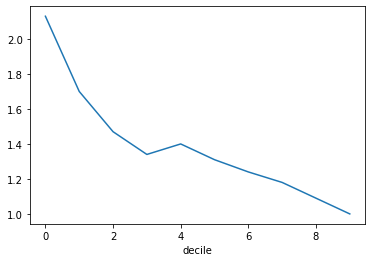

In [82]:
def gains_table(Y_test,y_pred):
    df_prep = pd.DataFrame(columns = ['actual','pred'])
    df_prep['actual'] = Y_test
    df_prep['pred'] =y_pred
    df_prep = df_prep.sort_values(by='pred',ascending=False)
    df_prep['row_id'] = range(0,0+len(df_prep))
    df_prep.head()

    df_prep['decile'] = (df_prep['row_id'] / (len(df_prep)/10)).astype(int)
    df_prep.loc[df_prep['decile'] == 10] =9
    df_prep['decile'].value_counts()

    # Create gains table
    gains = df_prep.groupby('decile')['actual'].agg(['count','sum'])
    gains.columns = ['count','actual']
    gains

    gains['non_actual'] = gains['count'] - gains['actual']
    gains['cum_count'] = gains['count'].cumsum()
    gains['cum_actual'] = gains['actual'].cumsum()
    gains['cum_non_actual'] = gains['non_actual'].cumsum()
    gains['percent_cum_actual'] = (gains['cum_actual'] / np.max(gains['cum_actual'])).round(2)
    gains['percent_cum_non_actual'] = (gains['cum_non_actual'] / np.max(gains['cum_non_actual'])).round(2)
    gains['if_random'] = np.max(gains['cum_actual']) /10
    gains['if_random'] = gains['if_random'].cumsum()
    gains['lift'] = (gains['cum_actual'] / gains['if_random']).round(2)
    gains['K_S'] = np.abs( gains['percent_cum_actual'] - gains['percent_cum_non_actual']  ) * 100 
    gains['gain'] = (gains['cum_actual'] / gains['cum_count']*100).round(2)
    return(gains)
    
gains = gains_table(Y_test,y_pred)
gains
gains['lift'].plot.line()

### (4.4) Cumulative Lift

<AxesSubplot:xlabel='decile'>

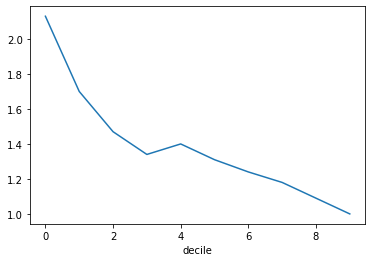

In [83]:
gains['lift'].plot.line()

<AxesSubplot:ylabel='actual'>

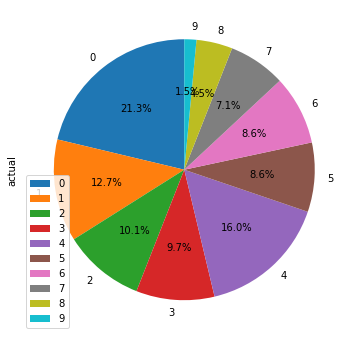

In [84]:
gains.plot.pie(y='actual',figsize=(6,6),autopct = '%1.1f%%', startangle=90)

### (4.5) Komogorov-Smirnov (K-S)

<AxesSubplot:xlabel='decile'>

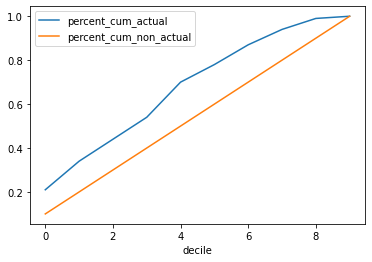

In [85]:
gains[['percent_cum_actual','percent_cum_non_actual']].plot.line()

In [86]:
gains['K_S'].max()

19.999999999999996